# Pymaceuticals Inc.
---

### Analysis

We looked at development of tumours per time interval , and at the final timepoint of 45 days.
We used our Time interval data and it is no surprise that the 4 regimes Capomulin, Ramicane, Infubinol and Ceftamin were examined further for our study at day 45. These regimes showed the lowest mean and median of tumor volume, the least variance and Tumor Vol Std Dev and Tumor Vol Std Err. We could trust that the data points seemed cohesive and the treatments effective.
Our data set only included mice who continued through the entire study of 45 days; which will exclude mice who died!
All mice were at timepoint 0 with the exact same tumour volume, which is remarkable (the tumors must have been induced with a mutagen), but makes the testing of treatment efficacy against the tumour volume at 45 days a valid test. We did not start the mice with a volume size multiplied by a co-efficient to reflect their body size. This is strange as Tumor has a dependency on bodyweight of the mouse test subject. The r value of 0.876 in our regression model shows this and the number shows the correlation is strong!
Each regime had comparable timepoint measurements, enough to be valid, and with a good male/female profile, close to even, with a spread of mouse ages.
According to my study, Capomulin offered the smallest IQR spread and a low median tumor weight.  Ramicane offered a small IQR spread and the lowest median. Neither of these 2 results had outliers. Infubinol regime had one outlier.
Our study was directed to look further at Capomulin.
For our target mouse l509 under the Capomulin regime, our line graph showed a dramatic effect after day 20 for the good.
Our box plot diagrams show that regimens Capomulin and Ramicane have lower median values at the 45 day point for tumor volume than that shown for entire the timeplot data. This is encouraging and is not shown for Infubinol and Ceftamin. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#mouse_metadata.info() gives 249 records for each column
study_results = pd.read_csv(study_results_path)
#study_results.info() gives 1893 records for each column

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. --> Unique mice
unique_mice_count = len(mouse_study_df['Mouse ID'].unique())
unique_mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]

duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

mouse_id_dup = duplicate_df['Mouse ID'].unique()
#mouse_id_dup[0]
stacked_df =  mouse_study_df.loc[(mouse_study_df["Mouse ID"] == mouse_id_dup[0]), :]
#mouse_study_df.loc[mouse_study_df[['Mouse ID', 'Timepoint']].duplicated(), :]
stacked_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_mouse_study_df = mouse_study_df.loc[(mouse_study_df["Mouse ID"] != "g989"), :]
clean_mouse_study_df = mouse_study_df.loc[(mouse_study_df["Mouse ID"] != mouse_id_dup[0]), :]
clean_mouse_study_df.shape



(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.

clean_unique_mice_count = len(clean_mouse_study_df['Mouse ID'].unique())
clean_unique_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_mouse_study_df.groupby('Drug Regimen')

l_reg_mean = regimen_df['Tumor Volume (mm3)'].mean()
l_reg_med = regimen_df['Tumor Volume (mm3)'].median()
l_reg_var = regimen_df['Tumor Volume (mm3)'].var()
l_reg_std = regimen_df['Tumor Volume (mm3)'].std()
l_reg_sem = regimen_df['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_stats_df = pd.DataFrame({
    'Mean Tumor Volume': l_reg_mean,
    'Median Tumor Volume': l_reg_med,
    'Tumor Volume Variance': l_reg_var,
    'Tumor Volume Std. Dev.': l_reg_std,
    'Tumor Volume Std. Err.': l_reg_sem
})

# Print the new DataFrame
regimen_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

<AxesSubplot:>

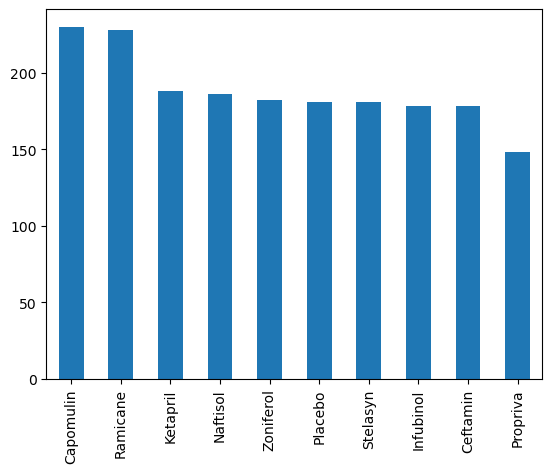

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
lim_clean_df = clean_mouse_study_df["Drug Regimen"].value_counts()
lim_clean_df.plot(kind='bar') 


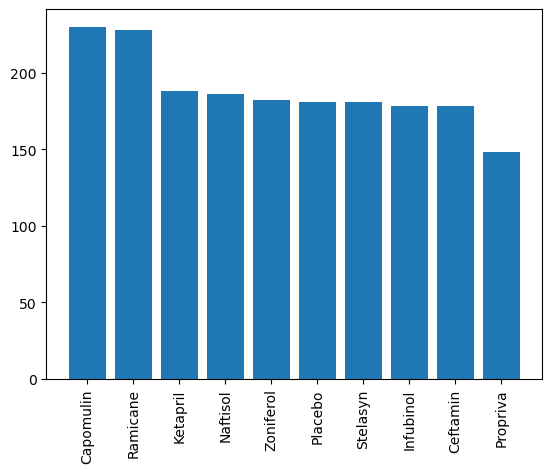

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
lim_clean_df = clean_mouse_study_df["Drug Regimen"].value_counts()
plt.bar(lim_clean_df.index, lim_clean_df.values)
plt.xticks(rotation='vertical')
plt.show()


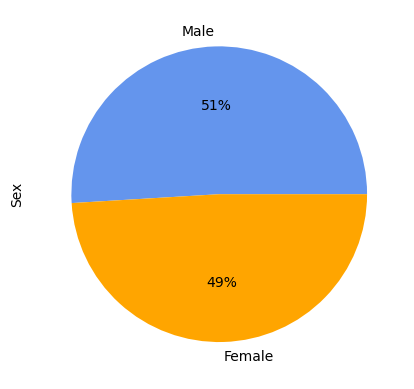

In [11]:
# Generate a pie plot showing the distribution of female versus male mice 
# using Pandas --> DataFrame.plot() method
lim_gen_df = clean_mouse_study_df["Sex"].value_counts()
#lim_gen_df_male = lim_gen_df.loc['Male'] 
#lim_gen_male
#lim_gen_female = lim_gen_df.loc['Female']
#lim_gen_female

lim_gen_df = clean_mouse_study_df["Sex"].value_counts()
colors = ['cornflowerblue', 'orange']  
explode = (0.00, 0.00) 
lim_gen_df.plot(kind='pie', labels=lim_gen_df.index, colors=colors, explode=explode, autopct='%1.0f%%')
#plt.suptitle('Sex', x=0.9, y=0.52, rotation='vertical')
plt.show()






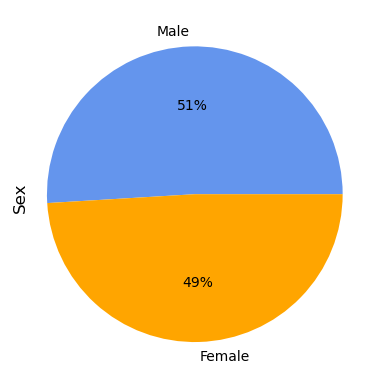

In [12]:
#Generate a pie plot showing the distribution of female versus mice using pyplot
lim_gen_df = clean_mouse_study_df["Sex"].value_counts()
colors = ['cornflowerblue', 'orange']  
explode = (0.00, 0.00) 
plt.pie(lim_gen_df, labels=lim_gen_df.index, colors=colors, explode=explode, autopct='%1.0f%%')
#plt.title('Sex')
plt.suptitle('Sex', x=0.24, y=0.52, rotation='vertical')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timpepoint_mouse_df = clean_mouse_study_df.groupby('Mouse ID')
l_time_max = timpepoint_mouse_df['Timepoint'].max()
timpepoint_mouse_stats_df = pd.DataFrame({
'Timepoint': l_time_max
})
timpepoint_mouse_stats_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint                                                         
mgd_clean_mouse_study_df  = pd.merge(timpepoint_mouse_stats_df, clean_mouse_study_df, how='left',left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
mgd_clean_mouse_study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Create empty list to fill with tumor vol data (for plotting)
emptytumorvollist = []
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
l_outlier = []
u_outlier = []
for i in treatment_list:
    show = mgd_clean_mouse_study_df.loc[(mgd_clean_mouse_study_df["Drug Regimen"] == i), :]
    emptytumorvollist.append([i, show['Tumor Volume (mm3)'].tolist()])
#below, sublist[0] is the regime in emptytumorvollist, sublist[1] is its tumor volume
for regimen in treatment_list:
    tumor_volumes = [item for sublist in emptytumorvollist if sublist[0] == regimen for item in sublist[1]]

    the_series = pd.Series(tumor_volumes)
    q1 = the_series.quantile(0.25)
    q3 = the_series.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    l_outlier = [item for sublist in emptytumorvollist if sublist[0] == regimen for item in sublist[1] if item < lower_bound]
    u_outlier = [item for sublist in emptytumorvollist if sublist[0] == regimen for item in sublist[1] if item > upper_bound]

    print(regimen, "IQR: ", IQR)
#    print("q1: ",q1)
#    print("q3: ",q3)
#    print("lower_bound: ", lower_bound)
#    print("upper_bound: ", upper_bound)
#    l_outlier = tumor_volumes.loc[(tumor_volumes)["Tumor Volume (mm3)"] < lower_bound doesn't work
    print(regimen,"'s lower_outlier: ", l_outlier)
    print(regimen,"'s upper_outlier: ", u_outlier)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
   

Capomulin IQR:  7.781863460000004
Capomulin 's lower_outlier:  []
Capomulin 's upper_outlier:  []
Ramicane IQR:  9.098536719999998
Ramicane 's lower_outlier:  []
Ramicane 's upper_outlier:  []
Infubinol IQR:  11.477135160000003
Infubinol 's lower_outlier:  [36.3213458]
Infubinol 's upper_outlier:  []
Ceftamin IQR:  15.577752179999997
Ceftamin 's lower_outlier:  []
Ceftamin 's upper_outlier:  []


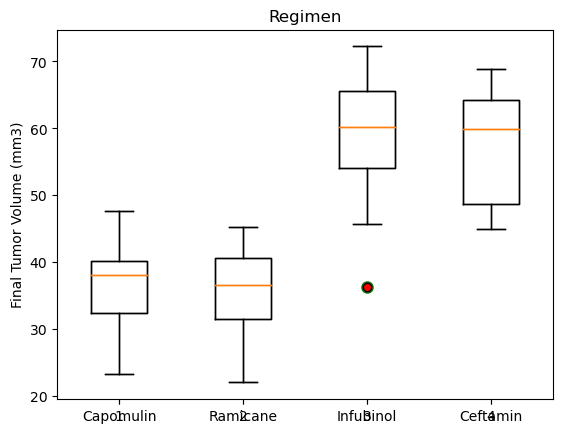

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#I am using a list of lists so this is complicated
#fig1, ax1 = plt.subplots()
#ax1.set_title('Regimen')
#ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(emptytumorvollist)
#plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# create a list of labels for each boxplot
labels = []
for i in emptytumorvollist:
    labels.append(i[0])

# create a list of data for each boxplot
data = []
for i in emptytumorvollist:
    data.append(i[1])
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(data, flierprops=flierprops)
ax1.boxplot(data, labels=labels)
plt.show()




## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

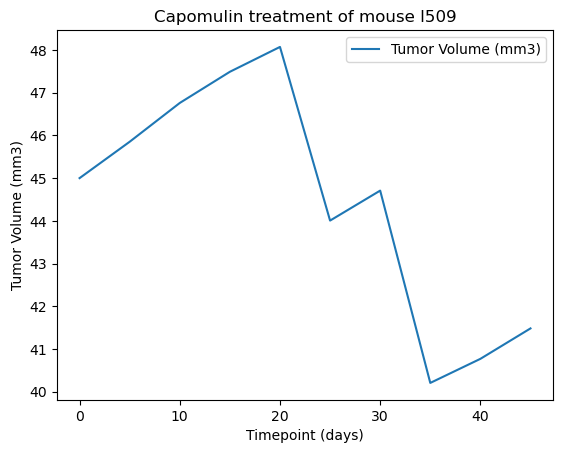

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509_df = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"] == 'Capomulin') & (clean_mouse_study_df['Mouse ID'] == 'l509'), ['Timepoint','Tumor Volume (mm3)']].reset_index(drop=True)

# Set Timepoint as the index
mouse_l509_df.set_index('Timepoint', inplace=True)

# Plot the "Tumor Volume (mm3)" values against time for mouse l509
ax=mouse_l509_df.plot()
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title('Capomulin treatment of mouse l509')

(22.0, 50.0)

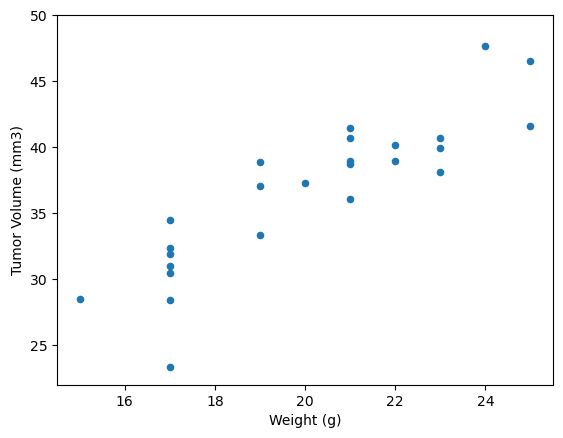

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# I am taking this to mean for just the end of trial
scatter_Capomulin_df = mgd_clean_mouse_study_df.loc[(mgd_clean_mouse_study_df["Drug Regimen"] == 'Capomulin'), ['Weight (g)','Tumor Volume (mm3)']].reset_index(drop=True)
ax = scatter_Capomulin_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

ax.set_ylim([22, 50])
#plt.show()



## Correlation and Regression

The r  correlation between mouse weight and the avg tumor volume is  is: 0.8767060403658119


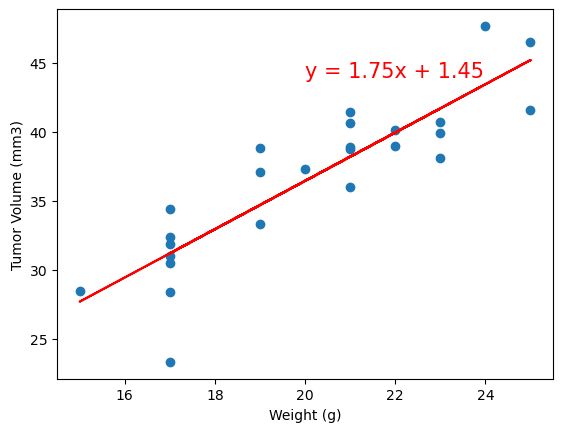

'y = 1.75x + 1.45'

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# I have used example week 5 day 3 regression_solution.ipynb
#ax = scatter_Capomulin_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

#ax.set_ylim([22, 50])

x_values = scatter_Capomulin_df['Weight (g)']
y_values = scatter_Capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,44),fontsize=15,color="red")#plt.xlabel('Rooms in House')

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r  correlation between mouse weight and the avg tumor volume is  is: {rvalue}")
plt.show()
line_eq
